In [1]:
#from __future__ import absolute_import , division , print_function()

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)


60000

In [5]:
len(test_labels)

10000

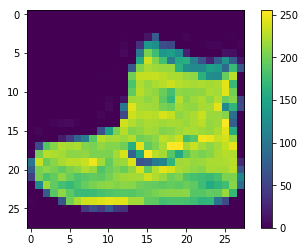

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128 , activation=tf.nn.relu),
    keras.layers.Dense(10 , activation=tf.nn.softmax),
])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
model.fit(train_images , train_labels , epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.5041 - acc: 0.8227
Epoch 2/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3741 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3367 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3130 - acc: 0.8844
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2961 - acc: 0.8905


In [12]:
test_loss , test_acc = model.evaluate(test_images , test_labels)

print("Test Accuracy" , test_acc , "\tTest Loss" , test_loss)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3532 - acc: 0.8730
Test Accuracy 0.873 	Test Loss 0.35316881160736086


In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([2.8518635e-08, 7.8571061e-10, 1.5854726e-09, 1.1468938e-08,
       1.1818649e-09, 2.6101815e-03, 1.3568912e-07, 3.8667421e-03,
       2.8312656e-06, 9.9352008e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

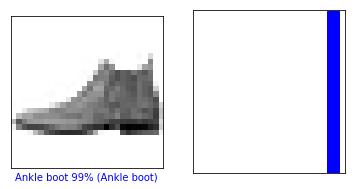

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


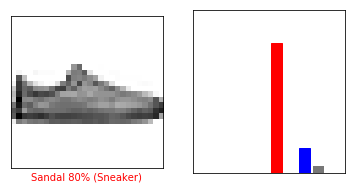

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


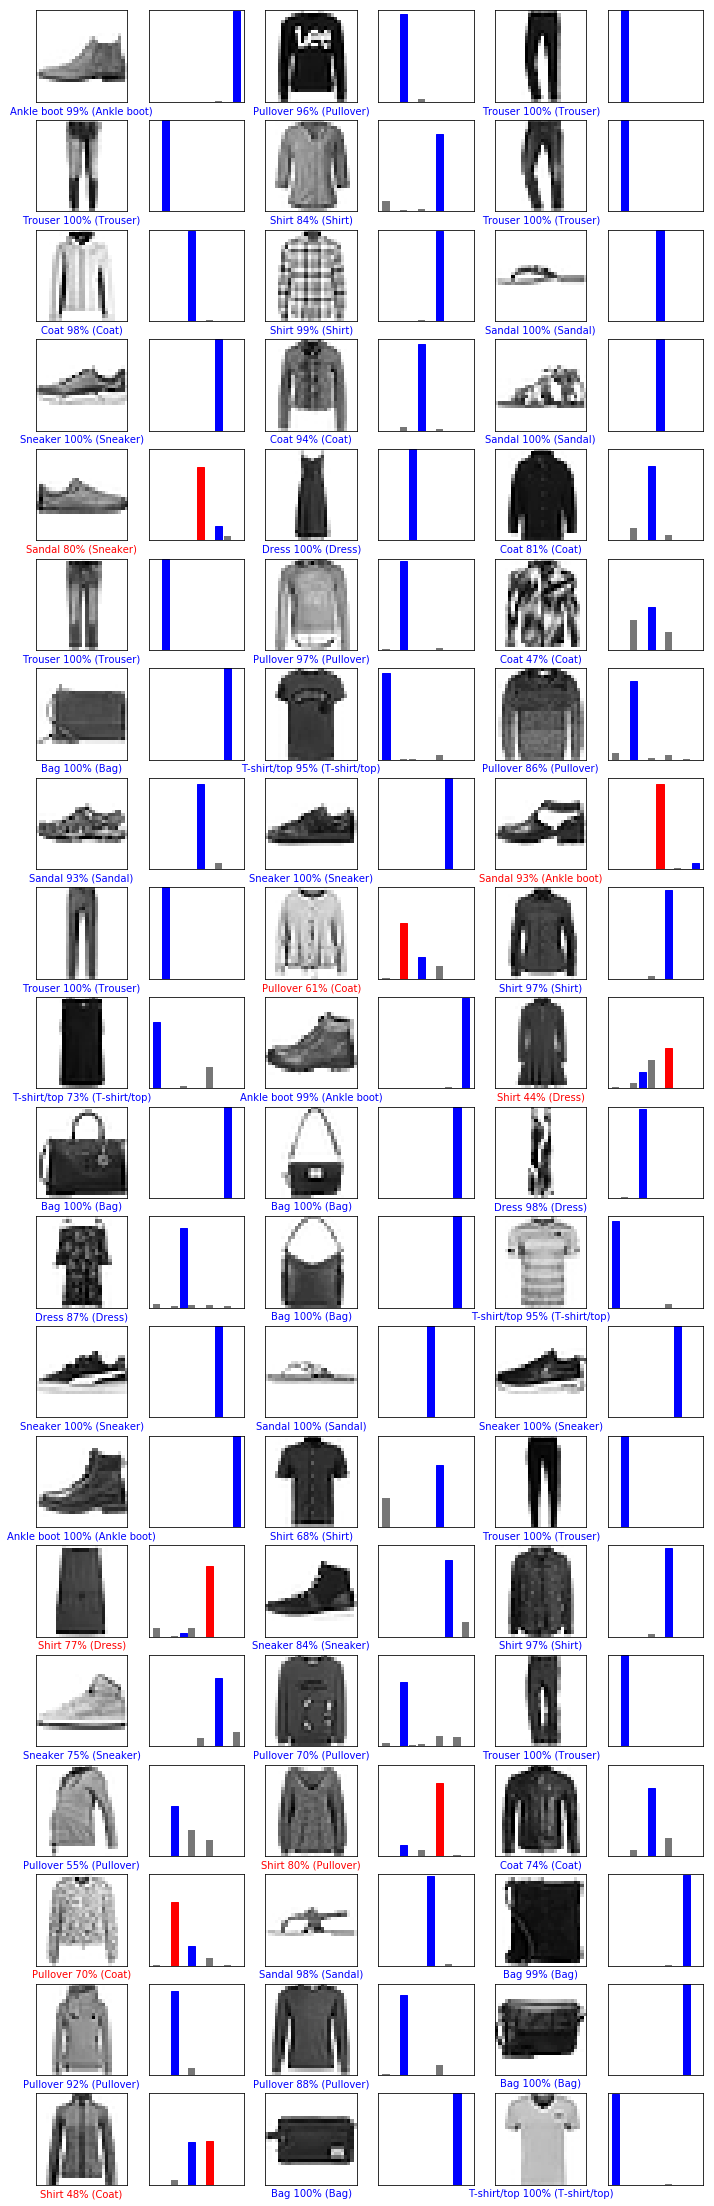

In [22]:
num_rows = 20
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


In [24]:
img = np.expand_dims(test_images[0] , 0)
print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)

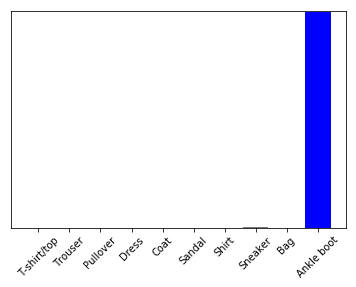

In [31]:
plot_value_array(0 , predictions_single , test_labels)
_ = plt.xticks(range(10) , class_names , rotation=45)


In [32]:
np.argmax(predictions_single[0])

9